# **Content**:

 - 2 [Visual Data Analysis](#VisualDataAnalysis)
   - 2.1 [Import data](#Importdata)
   - 2.2 [Correlation heatmap for features and targets](#heatmap)
   - 2.3 [Distribution of features](#Distribution)
   - 2.4 [Regression plots of features to the target](#Regressionplots)
 - 4 [Visual Data Analysis After Preprocessing](#VisualDataAnalysisAfterPreprocessing)
   - 4.1 [Import data](#import)
   - 4.2 [Distribution of features](#distribution)
   - 4.3 [Regression plots of features to the target](#regressionplots)
   - 4.4 [Distribution of targets](#TargetsDistribution)

# **2 Visual Data Analysis**  <a class="anchor" id="VisualDataAnalysis"></a>
In this part, we will try to get a better understanding of the properties of different features and their relation to the targets by plotting the features' correlations, the distributions of the features and regression plots for the features.

To reduce the computation burden, we randomly select a sample with 10 percent of the data to draw the graphs here;

To ease the description, we are only looking at the first target Ret_PluOne in the regression plots.

## Import data  <a class="anchor" id="Importdata"></a>
**NOTE**: Because the project is finished step by step, it's divided in several ```.ipynb``` files. We just import data and in each step for convinience, but data is compeletely the same as the previous step.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import csv
from csv import reader
train_X_df = csv.reader(open('..\Data_VDA\X_train_VDA.csv','r'))
train_Y_df = csv.reader(open('..\Data_VDA\y_train_VDA.csv','r'))
test_X_df = csv.reader(open('..\Data_VDA\X_test_VDA.csv','r'))

train_X_df = pd.DataFrame(train_X_df)
train_Y_df = pd.DataFrame(train_Y_df)
test_X_df = pd.DataFrame(test_X_df)

train_X_df = train_X_df.drop(0,axis=1);train_X_df = train_X_df.drop(0,axis=0)
train_Y_df = train_Y_df.drop(0,axis=1);train_Y_df = train_Y_df.drop(0,axis=0)
test_X_df = test_X_df.drop(0,axis=1);test_X_df = test_X_df.drop(0,axis=0)

features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6',
            'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12',
            'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18',
            'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
            'Feature_25', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_Agg', 'Ret_Agg_Std', 'Ret_Std', ]
targets = ['Ret_PlusOne', 'Ret_PlusTwo']
features_targets = features + targets

train_X_df.columns = features
train_Y_df.columns = targets
test_X_df.columns = features

In [26]:
train_X_Y_df = pd.concat([train_X_df, train_Y_df], axis=1)
print(f'Shape of training feature data: {train_X_Y_df.shape}')

Shape of training feature data: (40000, 32)


In [27]:
train_X_Y_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_Agg,Ret_Agg_Std,Ret_Std,Ret_PlusOne,Ret_PlusTwo
1,,,,,8,,75751,0.2254,11,,...,,,,0.055274899,-0.010770136,-0.025248409,0.000826397,0.046700892,-0.019512033684347008,0.028846364450516894
2,,,,,3,0.388896347,17369,0.0166,13,,...,1.239856019,0.953423827,-0.709462287,0.009747537,0.002987291,-0.008141553,0.000363683,0.004780215,-0.002938870456590266,-0.010253206201121868
3,,-0.696726938,0.73959068,-0.167928151,9,0.471946656,8277,0.365,9,5,...,1.728095551,-1.798089509,-1.01937037,0.003077219,0.006180929,-0.00063251,0.000524635,0.002194654,-0.02479127307936984,0.015710738624270422
4,,-0.694349689,1.568248081,0.479073083,5,0.120652882,22508,0.2654,13,5,...,1.551425375,-1.788725359,,0.000984161,0.014105874,0.001275897,0.000293636,0.009278452,-0.0056796288888900145,-0.0021904578801893886
5,6,-1.736489125,2.76553073,1.245279831,7,4.866984654,22423,0.2138,13,4,...,1.965189338,-5.993092364,3.219819851,-0.01822443,0.011064954,-0.002293147,0.000831918,0.020710722,0.03610375120968906,-0.026551600211529053


In [28]:
print('Data loaded')
print(f'Shape of training feature data: {train_X_df.shape}')
print(f'Shape of training target data: {train_Y_df.shape}')
print(f'Shape of test feature data: {test_X_df.shape}')

Data loaded
Shape of training feature data: (40000, 30)
Shape of training target data: (40000, 2)
Shape of test feature data: (120000, 30)


## Correlation heatmap for features and targets  <a class="anchor" id="heatmap"></a>

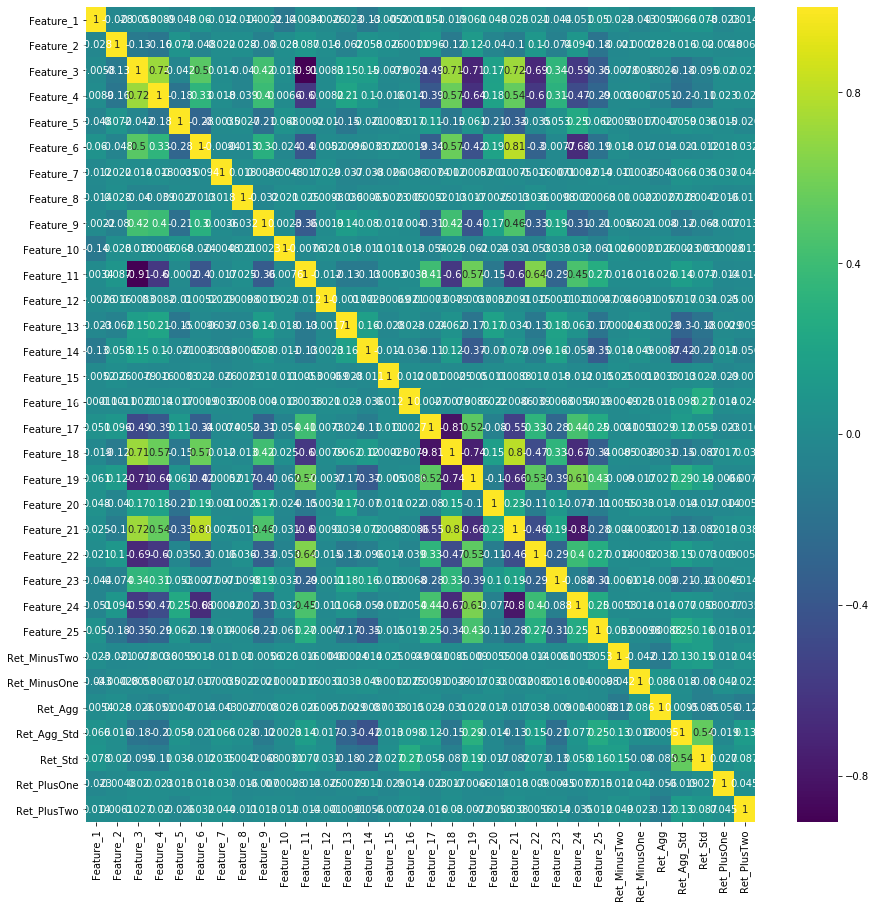

In [29]:
data_plot = train_X_Y_df.sample(frac=0.1, random_state=0)
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
data_plot[data_plot==''] = np.nan
data_plot_no_nan = pd.DataFrame(imputer.fit_transform(data_plot), columns=features_targets)
#data_plot_no_nan.head()

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_plot_no_nan.corr(), annot=True, ax=ax, cmap='viridis')

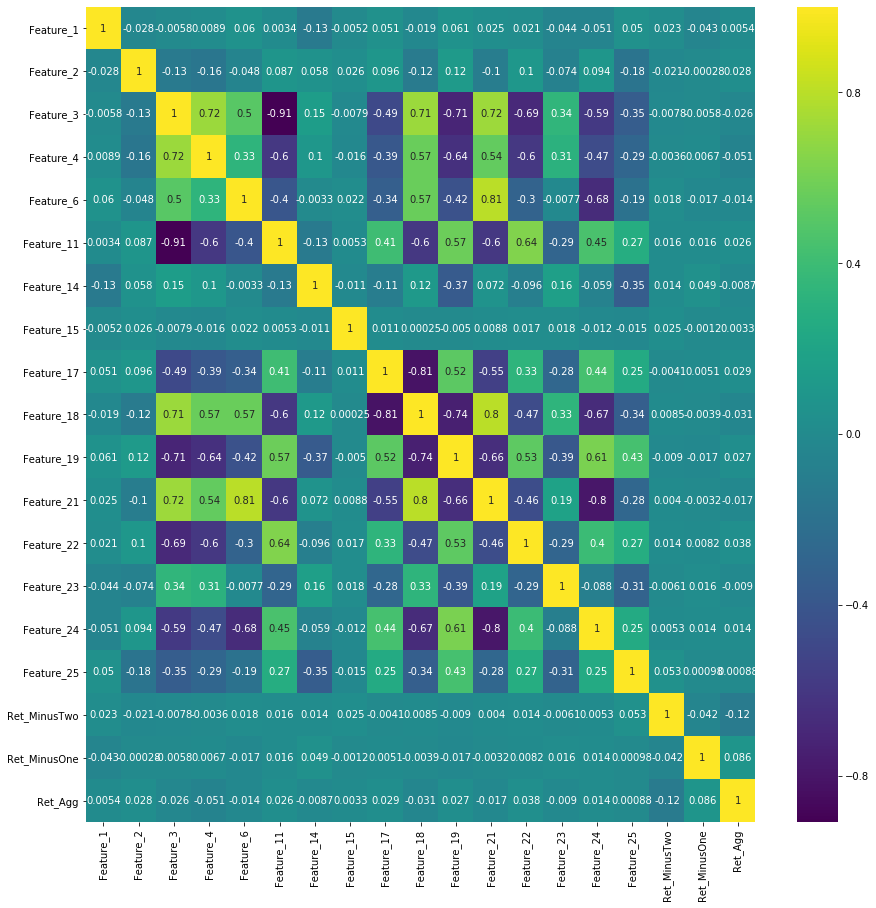

In [30]:
data_plot = train_X_Y_df.sample(frac=0.1, random_state=0)
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
data_plot[data_plot==''] = np.nan
data_plot_no_nan = pd.DataFrame(imputer.fit_transform(data_plot), columns=features_targets)
num_features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_6',
                    'Feature_11', 'Feature_14', 'Feature_15',
                    'Feature_17', 'Feature_18', 'Feature_19',
                    'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
                    'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_Agg']

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_plot_no_nan[num_features].corr(), annot=True, ax=ax, cmap='viridis')

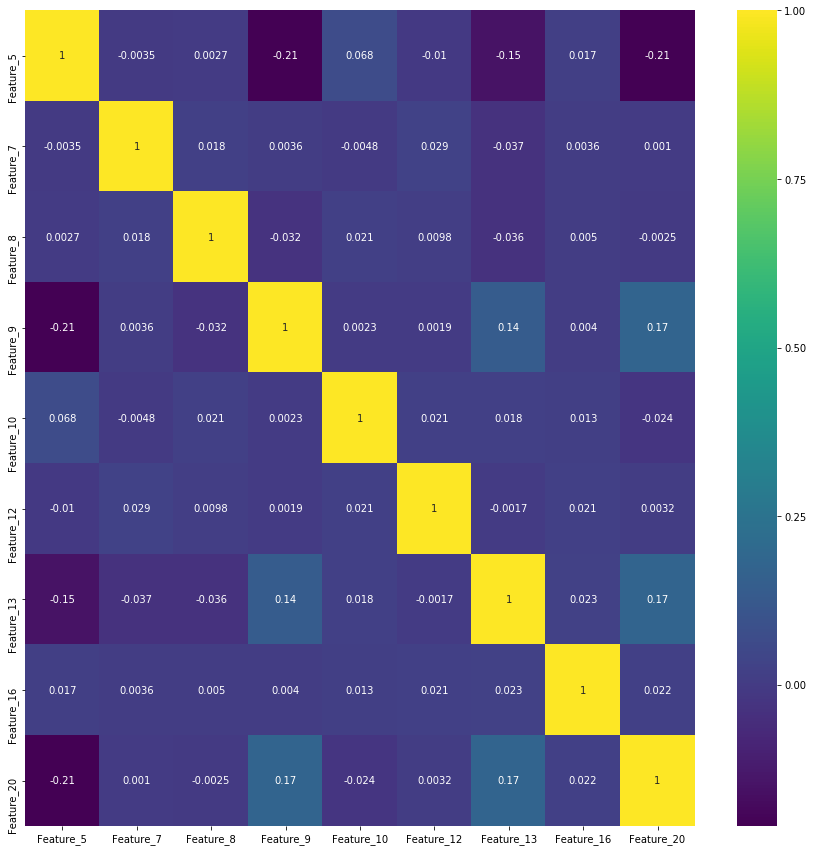

In [31]:
data_plot = train_X_Y_df.sample(frac=0.1, random_state=0)
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
data_plot[data_plot==''] = np.nan
data_plot_no_nan = pd.DataFrame(imputer.fit_transform(data_plot), columns=features_targets)
cat_features = ['Feature_5', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
                    'Feature_12', 'Feature_13', 'Feature_16', 'Feature_20']

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_plot_no_nan[cat_features].corr(), annot=True, ax=ax, cmap='viridis')

From the heatmap, we can see that each feature shows very litle correlation with targets.

We also observe a high correlation between some of the numerical features. The correlation represents a distinct concentration trend: 

[Feature_3 ~ Feature_11] correlates with [Feature_3 ~ Feature_11]

[Feature_3 ~ Feature_11] correlates with [Feature_17 ~ Feature_25]

[Feature_17 ~ Feature_25] correlates with [Feature_17 ~ Feature_25]

## Distribution of features  <a class="anchor" id="Distribution"></a>

In [32]:
train_X_df_plot = train_X_df.sample(frac=0.1, random_state=0)
test_X_df_plot = test_X_df.sample(frac=0.1, random_state=0)
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
train_X_df_plot[train_X_df_plot==''] = np.nan
test_X_df_plot[test_X_df_plot==''] = np.nan
train_X_no_nan = pd.DataFrame(imputer.fit_transform(train_X_df_plot), columns=features)
test_X_no_nan = pd.DataFrame(imputer.fit_transform(test_X_df_plot), columns=features)

In [33]:
#Distributions
def plotdis(train_df: pd.DataFrame, test_df: pd.DataFrame, features: list,
         transformer: Pipeline = None, frac: float = 0.1, label: str = ''):
      
    print(label)
    fig, ax = plt.subplots(round(len(features) / 3), 3, figsize=(15, 15))
    for i, ax in enumerate(fig.axes):
        if i < len(features):
            sns.distplot(train_df[features[i]], color='blue', ax=ax)
            sns.distplot(test_df[features[i]], color='red', ax=ax)

Raw distributions: Features


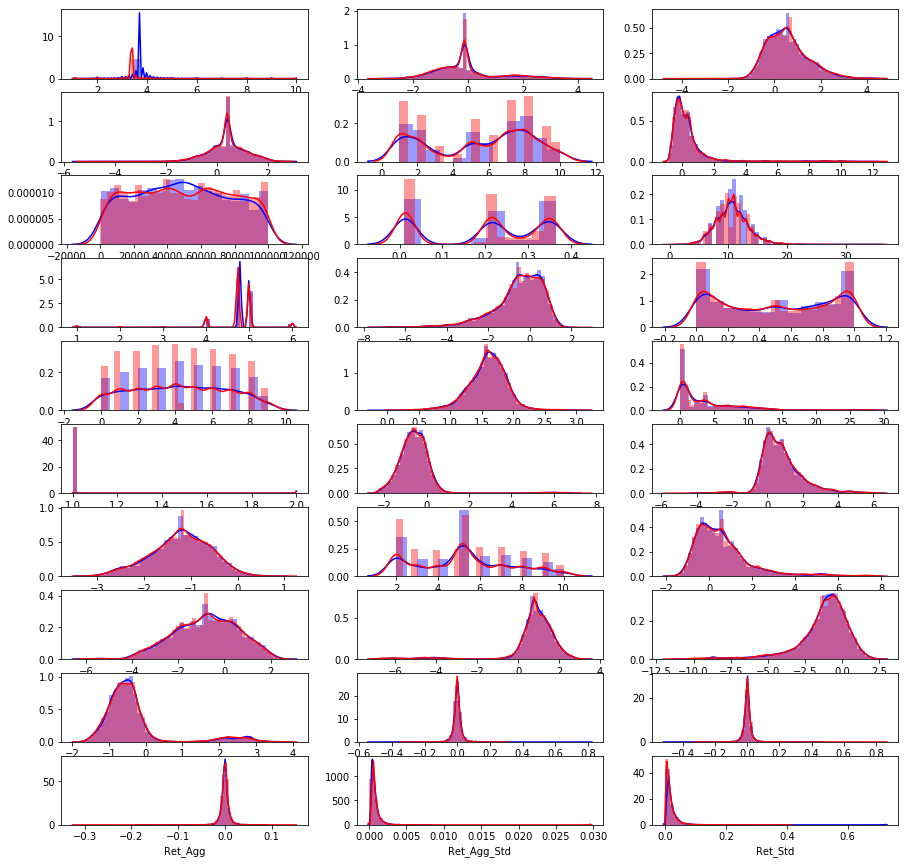

In [34]:
plotdis(train_X_no_nan, test_X_no_nan, features=features, label='Raw distributions: Features')

We observed that most of the feature distributions does not appear to be normal. We would deal with these issues in the next data processiong part.

## Regression plots of features to the target  <a class="anchor" id="Regressionplots"></a>

Regression plots:


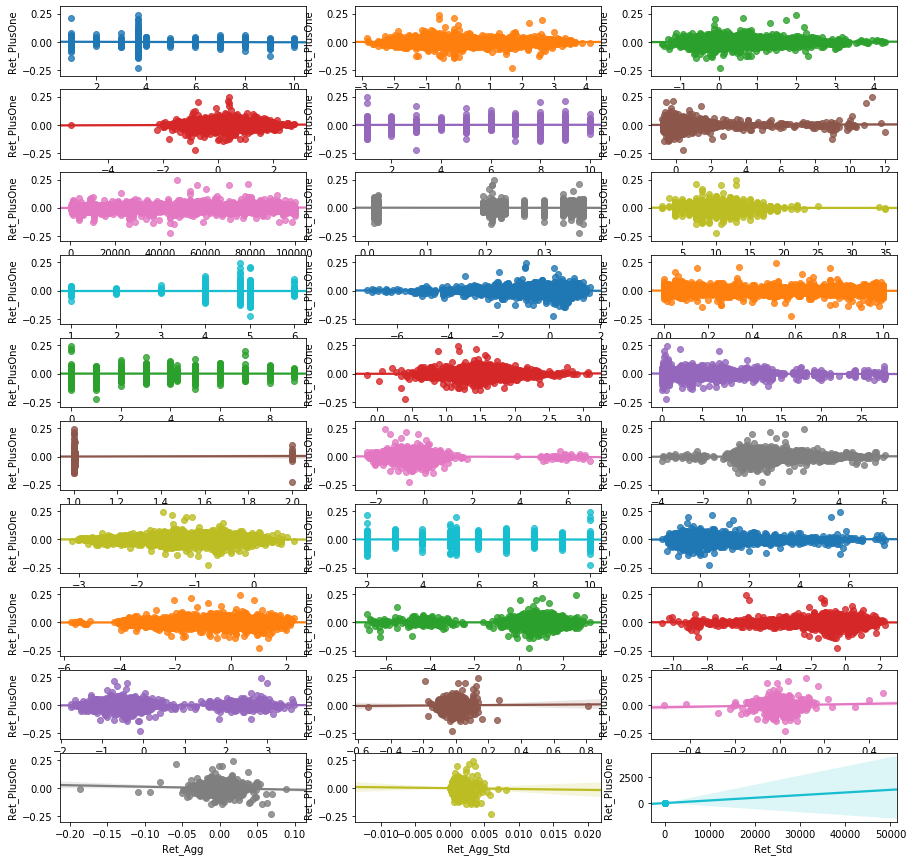

In [35]:
# Regression plots
print("Regression plots:")
fig, ax = plt.subplots(round(len(features) / 3), 3, figsize=(15, 15))
for i, ax in enumerate(fig.axes):
    if i < len(features):
        sns.regplot(x=features[i], y=targets[0], data=data_plot_no_nan, ax=ax)

The regression plots also show the correlation pattern of features and targets.

# **4 Visual Data Analysis After Preprocessing**  <a class="anchor" id="VisualDataAnalysisAfterPreprocessing"></a>
In this part, we will show the result of correlation elimination and normalizition.

## Import data  <a class="anchor" id="import"></a>

In [37]:
import csv
from csv import reader
Processed_test_X_df = csv.reader(open('..\Data_VDA\Processed_x_test_VDA.csv','r'))
Processed_train_X_df = csv.reader(open('..\Data_VDA\Processed_x_train_VDA.csv','r'))

Processed_train_X_df = pd.DataFrame(Processed_train_X_df)
Processed_test_X_df = pd.DataFrame(Processed_test_X_df)

num_features_final = ['Feature_2', 'Feature_3', 'Feature_4', 'Feature_6',
                      'Feature_11', 'Feature_14',
                      'Feature_17', 'Feature_18', 'Feature_19',
                      'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
                      'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_Agg', 'Ret_Agg_Std',
                      'Ret_Std']

Processed_train_X_df.columns = num_features_final
Processed_test_X_df.columns = num_features_final

In [38]:
print(f'Shape of processed training feature data: {Processed_train_X_df.shape}')
print(f'Shape of processed test feature data: {Processed_test_X_df.shape}')

Shape of processed training feature data: (40000, 19)
Shape of processed test feature data: (120000, 19)


In [39]:
Processed_train_X_df.head()

,Feature_2,Feature_3,Feature_4,Feature_6,Feature_11,Feature_14,Feature_17,Feature_18,Feature_19,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_Agg,Ret_Agg_Std,Ret_Std
0,0.289008006,-0.507163456,-0.413924001,-0.083932162,0.319742051,0.927036519,1.006071305,-0.764085901,0.321578003,-0.306535014,0.086404091,-1.298895095,0.781033812,1.078218058,1.940939678,-0.670441577,-2.190017131,0.508972504,1.489095261
1,0.289008006,-0.507163456,-0.413924001,0.522190648,-0.104132112,-0.098964075,-0.575548064,0.33729941,0.36329943,0.510961961,0.305594924,0.456557708,1.731162581,-0.394167651,0.607782489,0.282945342,-1.185813157,-0.970218981,-0.668900795
2,-0.579391162,0.366989806,-0.904483137,0.619693144,-0.158030974,1.0363588,-0.860541277,1.016131286,-0.676719056,-0.306535014,0.787802225,1.175681316,-0.65984547,-1.148629035,0.203558666,0.502280588,-0.101821772,-0.258746134,-1.170008071
3,-0.576944457,1.110585137,0.324577661,0.155162049,-1.261307906,-2.325094838,-0.858695307,0.857025216,1.855357792,0.729778199,-1.164733773,0.915946832,-0.653676492,1.078218058,0.061110525,0.943020694,0.286224348,-1.43614174,-0.129345518
4,-1.787541372,2.063237785,1.170043413,1.947869095,-2.311977353,-1.76600471,2.730372515,-2.74202698,0.063184035,1.720473873,2.085413039,1.495378174,-1.982065681,2.649022316,-1.036282865,0.79177695,-0.408690407,0.519264105,0.647671326


## Distribution of features  <a class="anchor" id="distribution"></a>

In [40]:
#Distributions
def plotdis(train_df: pd.DataFrame, test_df: pd.DataFrame, features: list,
         transformer: Pipeline = None, frac: float = 0.1, label: str = ''):
      
    print(label)
    fig, ax = plt.subplots(round(len(features) / 3), 3, figsize=(15, 15))
    for i, ax in enumerate(fig.axes):
        if i < len(features):
            sns.distplot(train_df[features[i]], color='blue', ax=ax)
            sns.distplot(test_df[features[i]], color='red', ax=ax)

After preproccssing numerical features: Distributions:


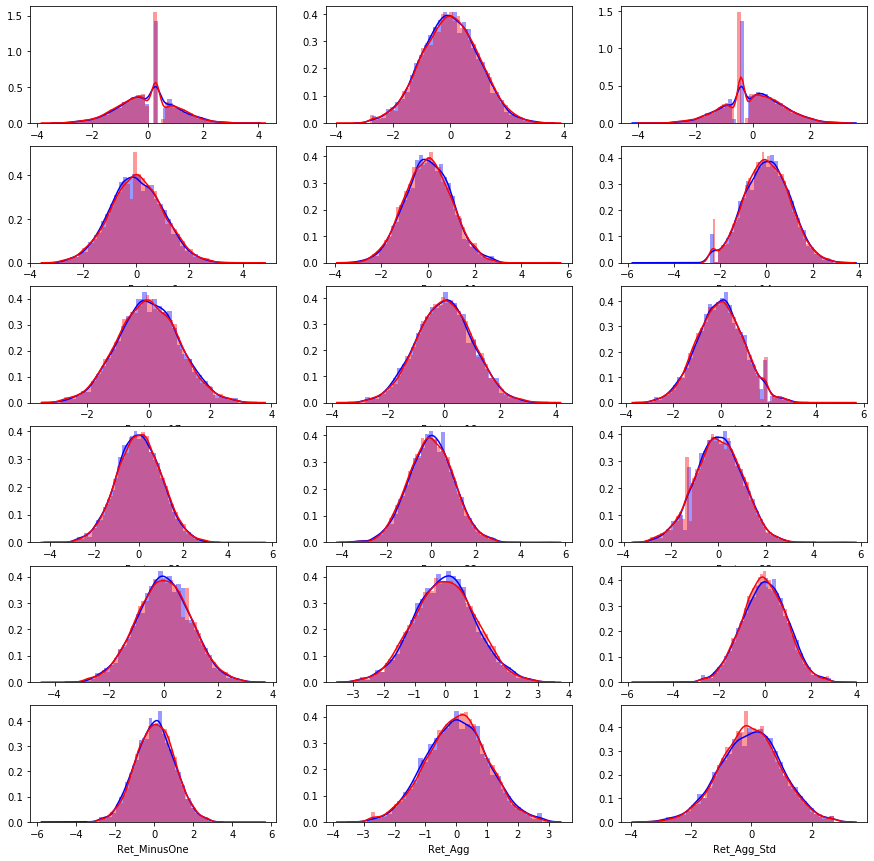

In [41]:
# Distributions of numerical features after preprocssesing
Processed_train_X_df_plot = Processed_train_X_df.sample(frac=0.1, random_state=0)
Processed_test_X_df_plot = Processed_test_X_df.sample(frac=0.1, random_state=0)
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
Processed_train_X_df_plot[Processed_train_X_df_plot==''] = np.nan
Processed_test_X_df_plot[Processed_test_X_df_plot==''] = np.nan
Processed_train_X_no_nan = pd.DataFrame(imputer.fit_transform(Processed_train_X_df_plot), columns=num_features_final)
Processed_test_X_no_nan = pd.DataFrame(imputer.fit_transform(Processed_test_X_df_plot), columns=num_features_final)

plotdis(Processed_train_X_no_nan, Processed_test_X_no_nan, features=num_features_final,
         label='After preproccssing numerical features: Distributions:')

## Regression plots of features to the target   <a class="anchor" id="regressionplots"></a>

In [52]:
preprocesser_Y_df = csv.reader(open('..\Data_VDA\y_train_VDA.csv','r'))
preprocesser_Y_df = pd.DataFrame(preprocesser_Y_df)
targets = ['Ret_PlusOne', 'Ret_PlusTwo']
preprocesser_Y_df.columns = targets
preprocesser_Y_df.head()

,Ret_PlusOne,Ret_PlusTwo
0,-0.019512034,0.028846364
1,-0.00293887,-0.010253206
2,-0.024791273,0.015710739
3,-0.005679629,-0.002190458
4,0.036103751,-0.0265516


In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

num_transformed = ss.fit_transform(
    Processed_train_X_no_nan[num_features_final])
viz_train_X_num_df = pd.DataFrame(
    num_transformed, columns=num_features_final)
viz_train_Y_df = pd.DataFrame(
    ss.fit_transform(preprocesser_Y_df), columns=targets)
viz_train_X_Y_num_df = pd.concat(
    [viz_train_X_num_df, viz_train_Y_df], axis=1)

After preproccssing numerical features: Regression plots:


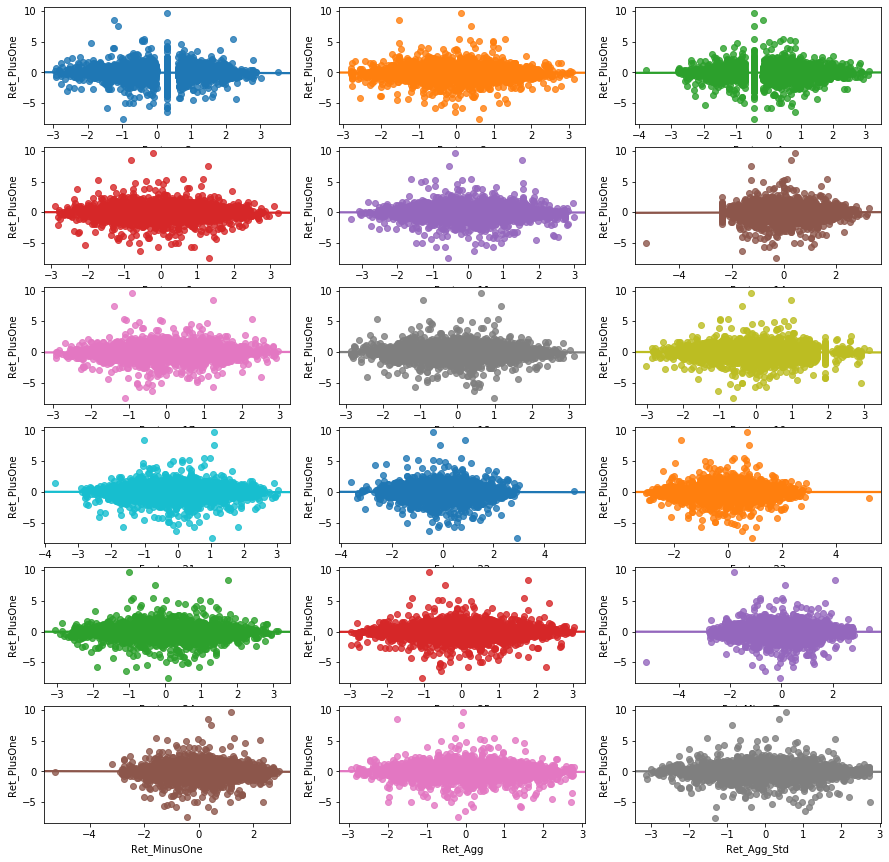

In [54]:
# Regression plots of numerical features after preprocssesing
print("After preproccssing numerical features: Regression plots:")
fig, ax = plt.subplots(
    round(len(num_features_final) / 3), 3, figsize=(15, 15))
for i, ax in enumerate(fig.axes):
    if i < len(num_features_final):
        sns.regplot(
           x=num_features_final[i], y=targets[0], data=viz_train_X_Y_num_df, ax=ax)

## Distribution of targets   <a class="anchor" id="TargetsDistribution"></a>

After preproccssing targets: Distributions:


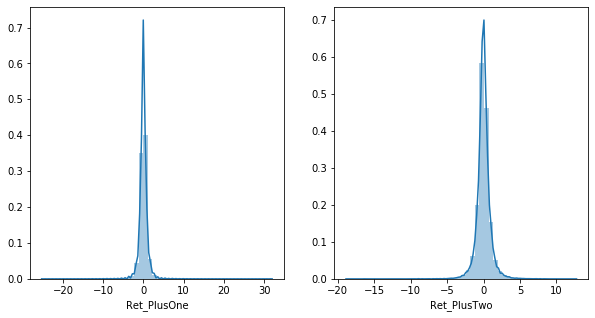

In [55]:
# Distributions of targets after preprocssesing
print("After preproccssing targets: Distributions:")
fig, ax = plt.subplots(round(len(targets) / 2), 2, figsize=(10, 5))
for i, ax in enumerate(fig.axes):
    if i < len(targets):
        sns.distplot(viz_train_Y_df[targets[i]], ax=ax)